Import library

In [1]:
from fastai import *
from fastai.vision import *

Path to dataset

In [2]:
path = Path("/notebooks/storage/dataset-resized"); path

PosixPath('/notebooks/storage/dataset-resized')

Create the fastai image data bunch

In [3]:
data = ImageDataBunch.from_folder(path,train='train',valid='valid',test='test',ds_tfms=get_transforms(),bs=64,size=224).normalize(imagenet_stats); data

ImageDataBunch;

Train: LabelList (1766 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Valid: LabelList (326 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Test: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /notebooks/storage/dataset-resized

Import the trained resnet 50 model

In [4]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate])

Find and plot the learning rate

In [5]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


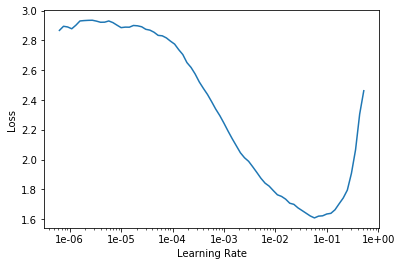

In [6]:
learn.recorder.plot()

Fit the model to the dataset

In [7]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.423426,0.577704,0.168712,00:13
1,0.915991,0.502092,0.128834,00:12
2,0.676852,0.415984,0.122699,00:12
3,0.507011,0.398605,0.119632,00:12
4,0.391403,0.358081,0.098160,00:12
5,0.310613,0.310435,0.095092,00:12
6,0.249948,0.323865,0.088957,00:12
7,0.193829,0.283624,0.082822,00:12
8,0.159745,0.271773,0.073620,00:12
9,0.137650,0.273418,0.067485,00:12


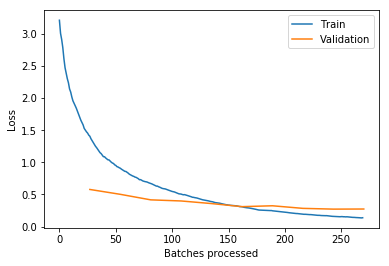

In [8]:
learn.recorder.plot_losses()

Display the errors made on validation set

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

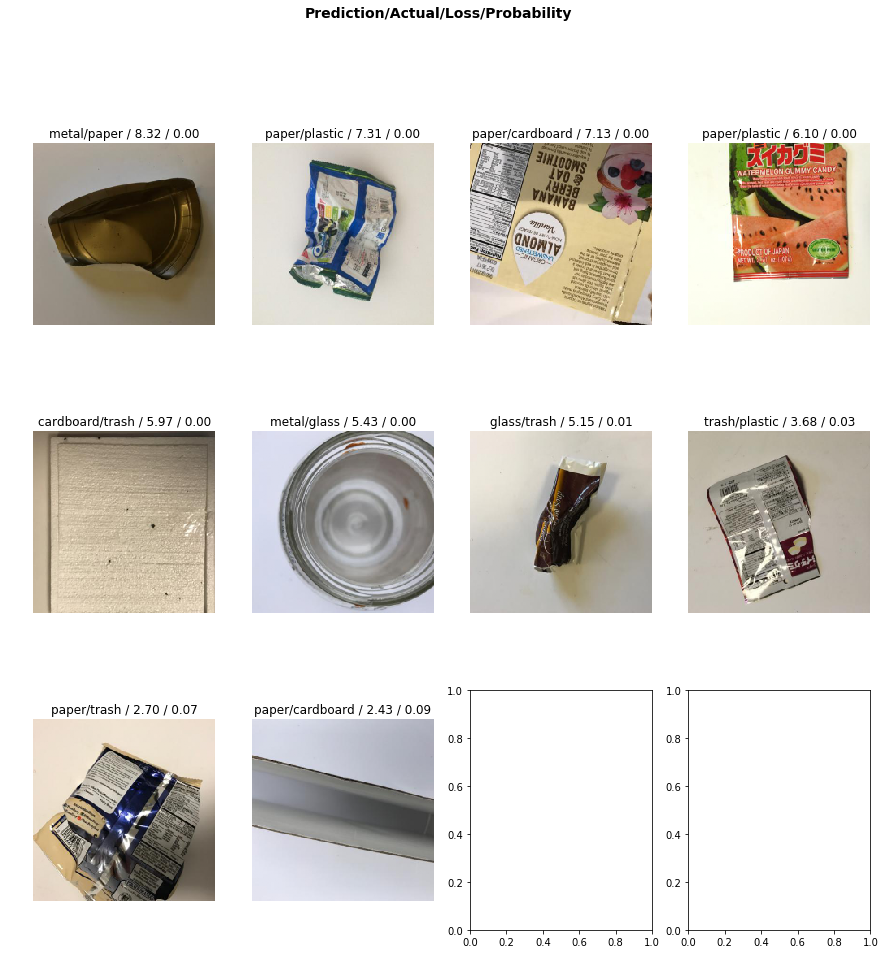

In [11]:
interp.plot_top_losses(10, figsize=(15,15))

Plot the confusion matrix for validation set

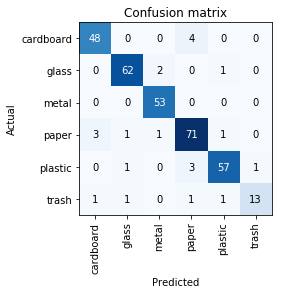

In [12]:
interp.plot_confusion_matrix()

Export model alongwith all transformations, classes, normalization, etc on dataset

In [13]:
learn.export('export-res50')

Save the model weights

In [14]:
learn.save("stage-2-res50",return_path = True)


PosixPath('/notebooks/storage/dataset-resized/models/stage-2-res50.pth')

Get predictions on test set

In [15]:
preds = learn.get_preds(ds_type=DatasetType.Test); preds[0]

tensor([[3.2053e-04, 7.5245e-01, 1.3993e-03, 1.0094e-04, 2.4571e-01, 1.3244e-05],
        [4.8951e-07, 9.9989e-01, 4.7615e-06, 3.1366e-07, 3.4142e-05, 6.8071e-05],
        [4.2014e-08, 9.9940e-01, 2.0963e-04, 9.5265e-05, 2.7623e-04, 2.2877e-05],
        ...,
        [1.0097e-05, 9.6716e-01, 3.1514e-02, 1.3736e-06, 1.2815e-03, 3.3967e-05],
        [6.1620e-05, 3.9748e-04, 9.9941e-01, 1.9466e-06, 1.0323e-04, 2.3801e-05],
        [8.2892e-07, 8.9038e-03, 9.8790e-01, 1.2631e-05, 2.8204e-03, 3.6413e-04]])

In [16]:
max(preds[0][0]).item()
#reds[0][0]

0.7524511218070984

In [17]:
output_list = []
for i in range (len(preds[0])):
    indx = np.argmax(preds[0][i]).item()
    prediction = str(preds[0][i][indx].item())
    output_list.append({data.classes[indx]:prediction})
print(len(output_list))


435


Lets pick a random test image and see how well we have done.

{'cardboard': '0.9994207620620728'}


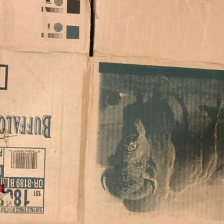

In [18]:
print(output_list[279])
learn.data.test_ds[279][0]


Overload the image data bunch and supply test set along with labels as the valid set to get confusion matrix and all

In [19]:
data_test = ImageDataBunch.from_folder(path, train='train', valid='test', bs=64, size=224, ds_tfms = get_transforms()).normalize(imagenet_stats)

In [20]:
learn_test = cnn_learner(data_test, models.resnet50, metrics=[error_rate])

In [21]:
learn_test.load('stage-2-res50')

Learner(data=ImageDataBunch;

Train: LabelList (1766 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Valid: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, moment

In [22]:
interp_test = ClassificationInterpretation.from_learner(learn_test)


In [23]:
losses,idxs = interp_test.top_losses()


Add the diagonal (going left to right downwards) numbers and divide by 435 to get accuracy = 88.505%

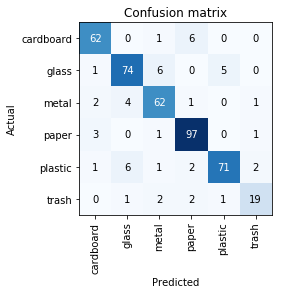

In [26]:
interp_test.plot_confusion_matrix()

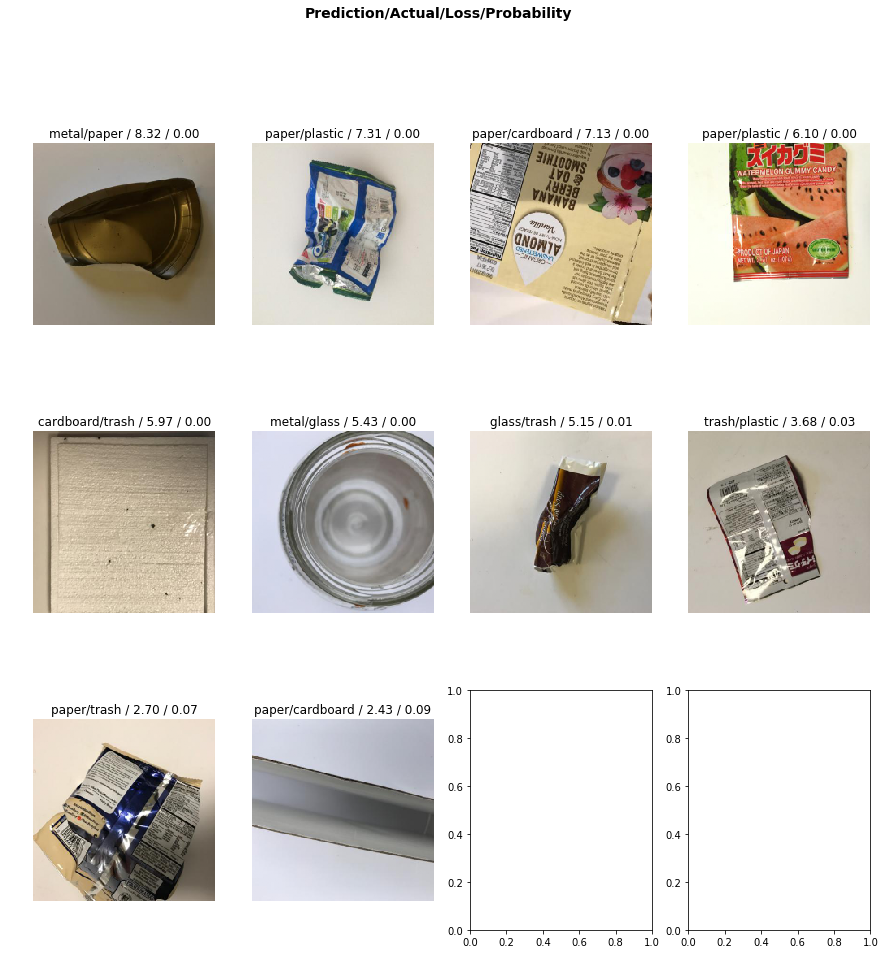

In [27]:
interp.plot_top_losses(10,figsize=(15,15))